# Classification Mid-term Project: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

## 0. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## 1. Load the dataset

In [75]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [76]:
dataset.head(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Data preprocessing 

In [77]:
# delete code
dataset.pop('Code')

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
5      1017122
6      1018099
7      1018561
8      1033078
9      1033078
10     1035283
11     1036172
12     1041801
13     1043999
14     1044572
15     1047630
16     1048672
17     1049815
18     1050670
19     1050718
20     1054590
21     1054593
22     1056784
23     1057013
24     1059552
25     1065726
26     1066373
27     1066979
28     1067444
29     1070935
        ...   
669    1350423
670    1352848
671    1353092
672    1354840
673    1354840
674    1355260
675    1365075
676    1365328
677    1368267
678    1368273
679    1368882
680    1369821
681    1371026
682    1371920
683     466906
684     466906
685     534555
686     536708
687     566346
688     603148
689     654546
690     654546
691     695091
692     714039
693     763235
694     776715
695     841769
696     888820
697     897471
698     897471
Name: Code, Length: 699, dtype: int64

In [78]:
dataset.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## 3. Data summarization

In [79]:
# shape
dataset.shape

(699, 10)

In [80]:
dataset_2 = dataset.drop(dataset[dataset['Bare-Nuclei']=='?'].index)

In [81]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
pd.set_option('display.width', 200)
print(dataset_2.describe())

       Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Chromatin  Nucleoli  Mitoses    Class
count          683.000    683.000     683.000   683.000           683.000    683.000   683.000  683.000  683.000
mean             4.442      3.151       3.215     2.830             3.234      3.445     2.870    1.603    2.700
std              2.821      3.065       2.989     2.865             2.223      2.450     3.053    1.733    0.955
min              1.000      1.000       1.000     1.000             1.000      1.000     1.000    1.000    2.000
25%              2.000      1.000       1.000     1.000             2.000      2.000     1.000    1.000    2.000
50%              4.000      1.000       1.000     1.000             2.000      3.000     1.000    1.000    2.000
75%              6.000      5.000       5.000     4.000             4.000      5.000     4.000    1.000    4.000
max             10.000     10.000      10.000    10.000            10.000     10.000    10.000  

In [87]:
dataset_2['Bare-Nuclei'].astype('float',copy=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump-Thickness     683 non-null int64
Cell-Size           683 non-null int64
Cell-Shape          683 non-null int64
Adhesion            683 non-null int64
Single-Cell-Size    683 non-null int64
Bare-Nuclei         683 non-null object
Chromatin           683 non-null int64
Nucleoli            683 non-null int64
Mitoses             683 non-null int64
Class               683 non-null int64
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [83]:
# class distribution
dataset_2.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [17]:
# correlation


                  Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses  Class
Clump-Thickness             1.000      0.642       0.653     0.488             0.524        0.593      0.554     0.534    0.351  0.715
Cell-Size                   0.642      1.000       0.907     0.707             0.754        0.692      0.756     0.719    0.461  0.821
Cell-Shape                  0.653      0.907       1.000     0.686             0.722        0.714      0.735     0.718    0.441  0.822
Adhesion                    0.488      0.707       0.686     1.000             0.595        0.671      0.669     0.603    0.419  0.706
Single-Cell-Size            0.524      0.754       0.722     0.595             1.000        0.586      0.618     0.629    0.481  0.691
Bare-Nuclei                 0.593      0.692       0.714     0.671             0.586        1.000      0.681     0.584    0.339  0.823
Chromatin                   0.554      0.756       0.73

In [70]:
corr = dataset_2.corr(method='pearson')
corr

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Chromatin,Nucleoli,Mitoses,Class
Clump-Thickness,1.000,0.642,0.653,0.488,0.524,0.554,0.534,0.351,0.715
Cell-Size,0.642,1.000,0.907,0.707,0.754,0.756,0.719,0.461,0.821
Cell-Shape,0.653,0.907,1.000,0.686,0.722,0.735,0.718,0.441,0.822
Adhesion,0.488,0.707,0.686,1.000,0.595,0.669,0.603,0.419,0.706
Single-Cell-Size,0.524,0.754,0.722,0.595,1.000,0.618,0.629,0.481,0.691
Chromatin,0.554,0.756,0.735,0.669,0.618,1.000,0.666,0.346,0.758
Nucleoli,0.534,0.719,0.718,0.603,0.629,0.666,1.000,0.434,0.719
Mitoses,0.351,0.461,0.441,0.419,0.481,0.346,0.434,1.000,0.423
Class,0.715,0.821,0.822,0.706,0.691,0.758,0.719,0.423,1.000


## 4. Data visualization

In [37]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DD5E01F28>,
      dtype=object)

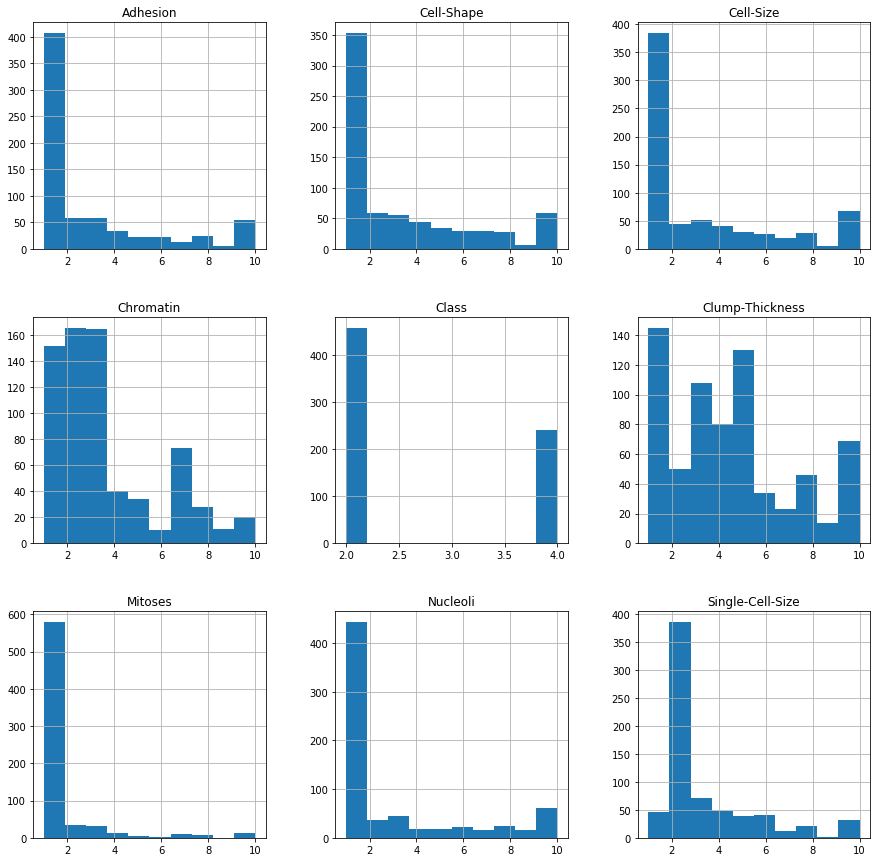

In [38]:
dataset.hist()

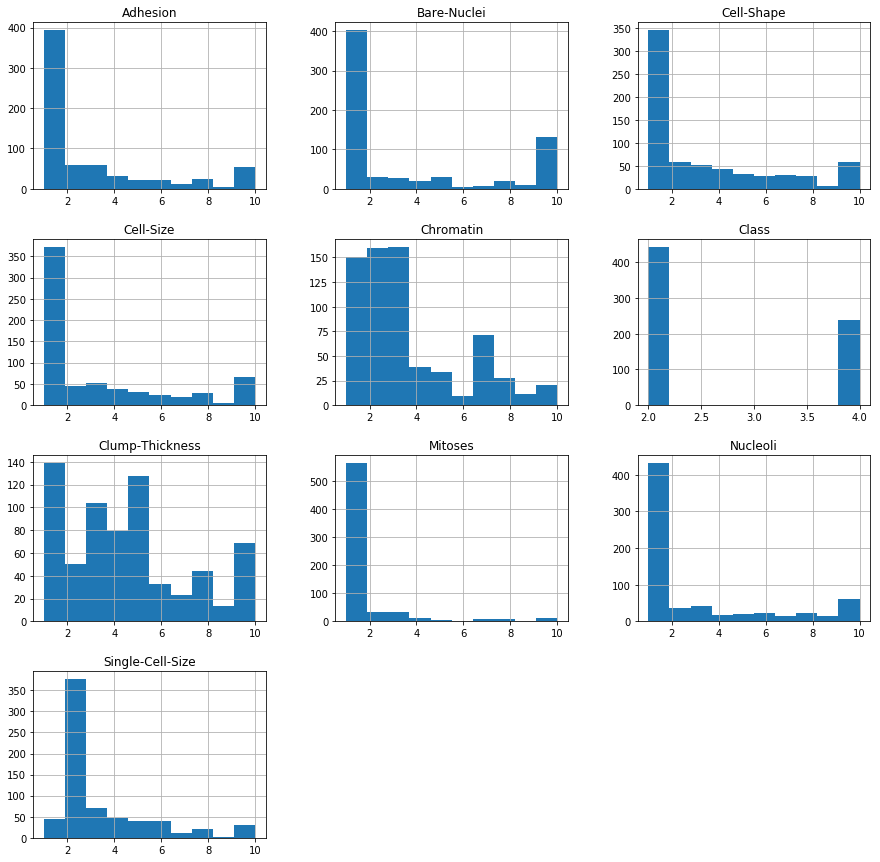

In [19]:
# histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE27AEF60>,
      dtype=object)

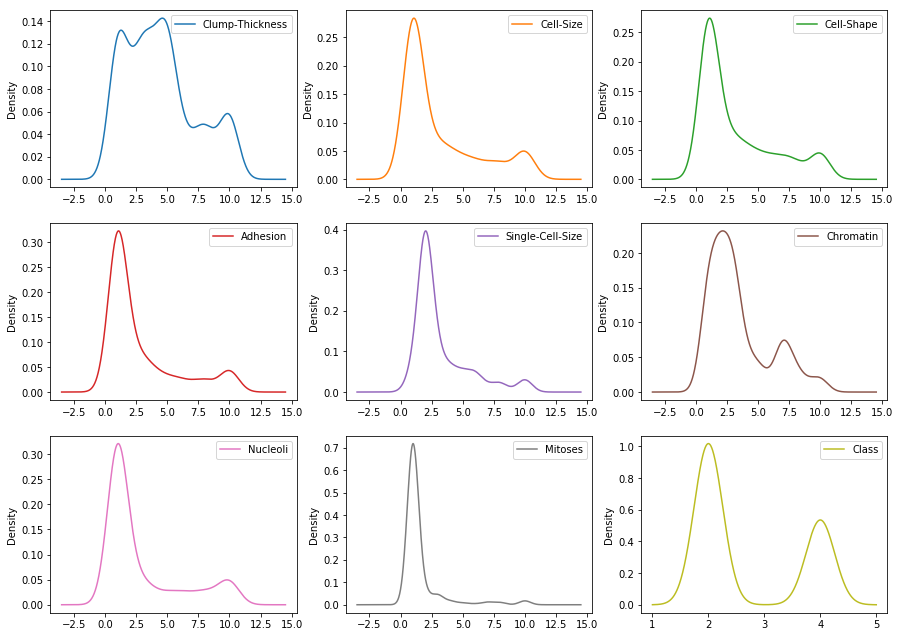

In [90]:
# Determine the size of figures made by pyplot
dataset.plot(kind='kde',layout=(4,3),subplots=True,sharex=False)


Clump-Thickness         AxesSubplot(0.125,0.71587;0.227941x0.16413)
Cell-Size            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Cell-Shape           AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Adhesion               AxesSubplot(0.125,0.518913;0.227941x0.16413)
Single-Cell-Size    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Chromatin           AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Nucleoli               AxesSubplot(0.125,0.321957;0.227941x0.16413)
Mitoses             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Class               AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

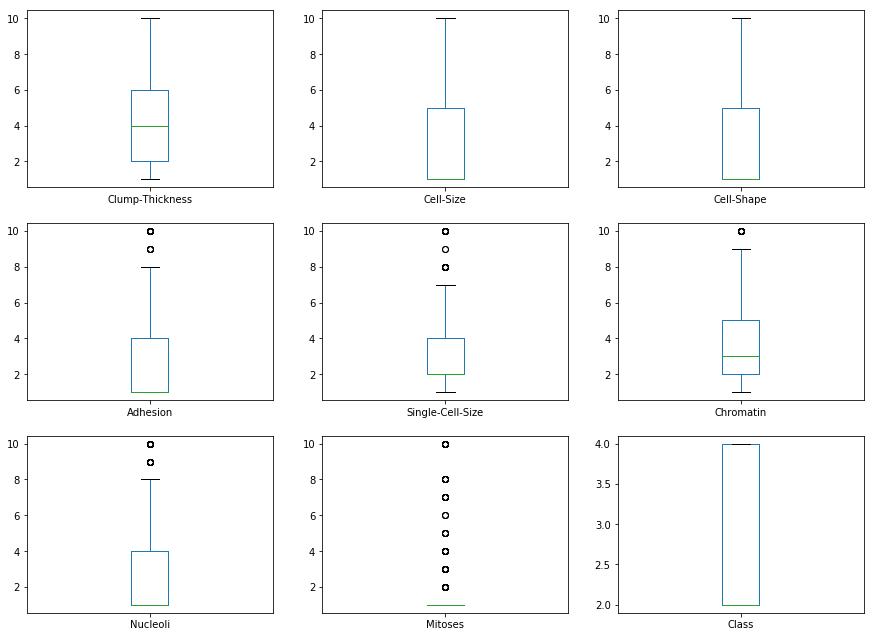

In [92]:
# box plots
dataset.plot(kind='box',layout=(4,3),subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE3AD67B8>,
      dtype=object)

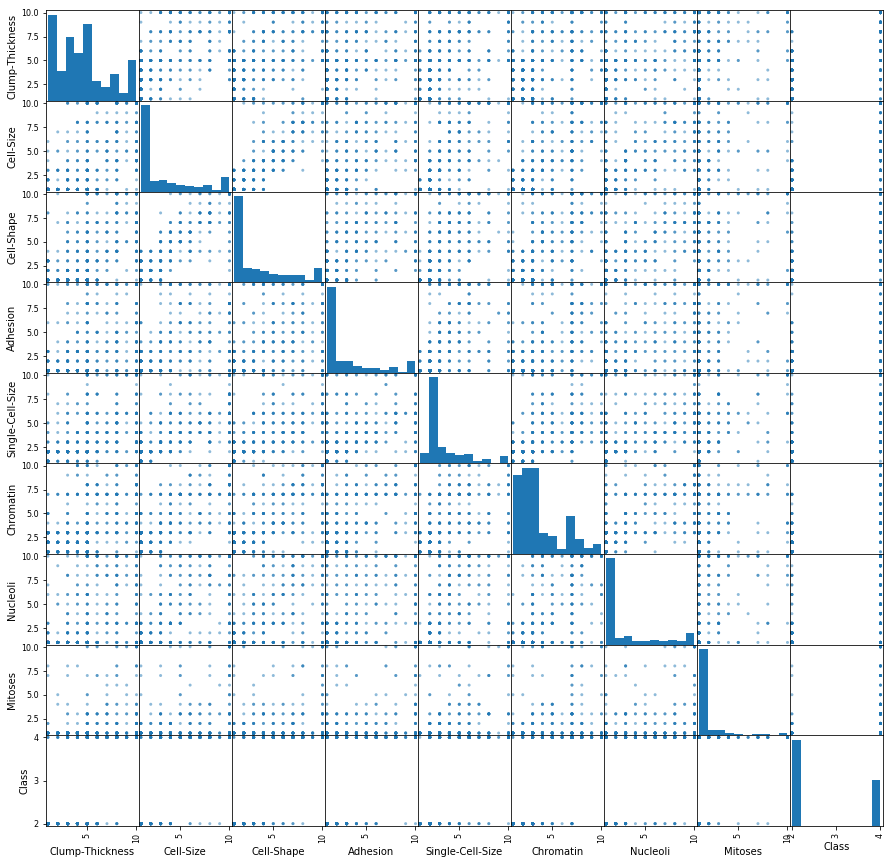

In [93]:
# scatter plot matrix
scatter_matrix(dataset)

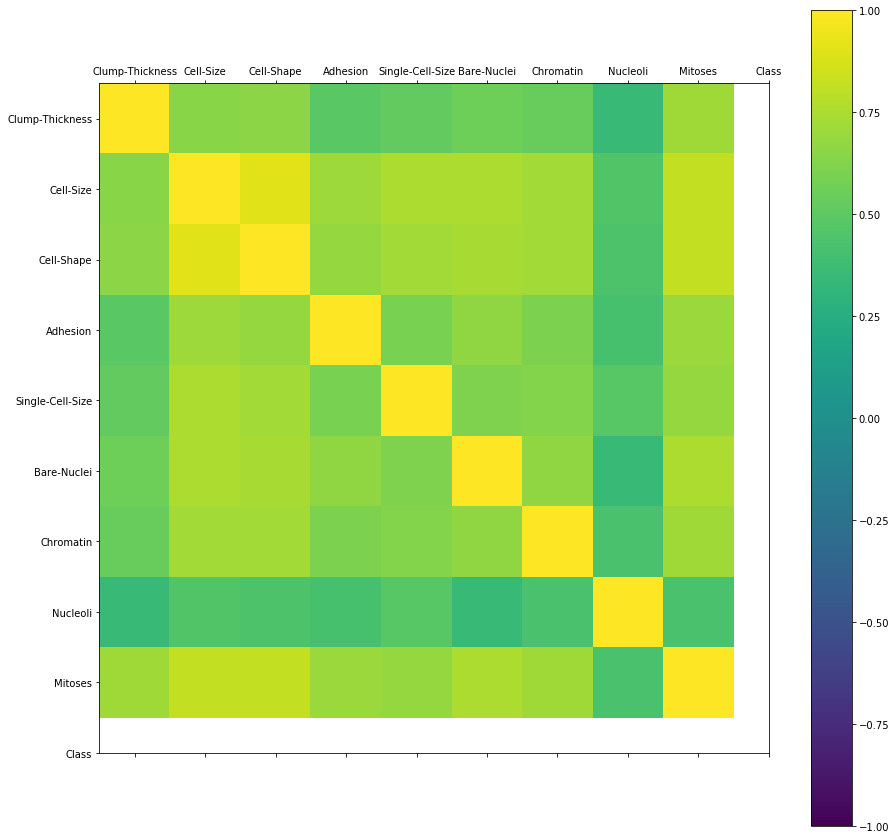

In [96]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

## 5.  Preparation

In [29]:
# Split-out validation dataset- X, y


In [30]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

## 6. Learn models

In [31]:
models = []




In [32]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [44]:
# model - cross validation



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.965219 (0.019105)
LDA: 0.963367 (0.018253)
KNN: 0.967071 (0.026935)
CART: 0.935859 (0.026193)
NB: 0.970741 (0.012114)
RF: 0.963434 (0.024547)
[array([0.98181818, 0.96363636, 0.96363636, 0.98181818, 0.92727273,
       0.96363636, 0.96296296, 1.        , 0.96296296, 0.94444444]), array([0.96363636, 0.96363636, 0.96363636, 1.        , 0.92727273,
       0.96363636, 0.96296296, 0.98148148, 0.96296296, 0.94444444]), array([1.        , 0.96363636, 0.94545455, 0.98181818, 0.92727273,
       0.96363636, 1.        , 1.        , 0.96296296, 0.92592593]), array([0.96363636, 0.94545455, 0.98181818, 0.90909091, 0.89090909,
       0.94545455, 0.94444444, 0.92592593, 0.90740741, 0.94444444]), array([0.98181818, 0.96363636, 0.96363636, 0.96363636, 0.96363636,
       0.96363636, 1.        , 0.98148148, 0.96296296, 0.96296296]), array([0.98181818, 0.96363636, 0.94545455, 0.98181818, 0.92727273,
       0.94545455, 1.        , 1.        , 0.94444444, 0.94444444])]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

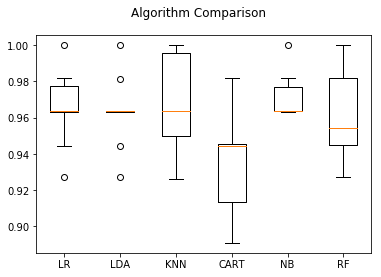

In [45]:
# Compare Algorithms - Bar Chart


In [46]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [47]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledLDA', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART', Pi

In [49]:
results = []
names = []

# model cross validation

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

ScaledLR: 0.967071 (0.017858)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.968923 (0.024576)
ScaledCART: 0.934007 (0.014910)
ScaledNB: 0.970741 (0.012114)
ScaledRF: 0.965253 (0.017105)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

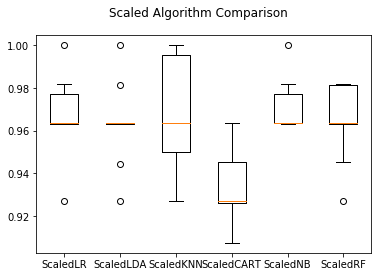

In [50]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')


In [58]:
# Normalize the dataset - MInMaxScaler
pipelines = []




C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

ScaledLR: 0.968889 (0.020057)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.967071 (0.026935)
ScaledCART: 0.939529 (0.027167)
ScaledNB: 0.970741 (0.012114)
ScaledRF: 0.957811 (0.016582)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

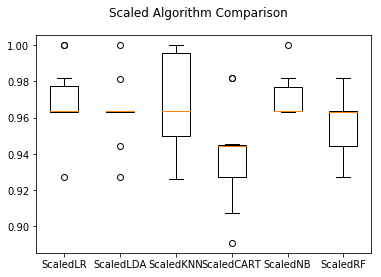

In [59]:
# Compare Algorithms
